In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#cargamos el contenido de nuestro Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')
#cargamos el archivo que deseamos manipular

inmuebles.head()
#inmuebles.head() permite ver las primeras 5 filas

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [ ]:
#renombramos las columnas como anteriormente se realizó
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns = columnas)

In [ ]:
#Realizamos el tratamiento de datos aplicado en el Aula 2
inmuebles.Valor.str.split()
inmuebles.Valor.str.split(expand=True)

valor = inmuebles.Valor.str.split(expand=True);

inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]

inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

#Obtenemos el Precio en Millones y como un tipo de dato numerico
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
#Mejoramos la presentación de datos
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x:'%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [ ]:
#Creamos una nueva columna, la cual referirá al valor del metro cuadrado en millones
inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area']
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78


In [ ]:
#Agrupamos los barrios y obtenemos el promedio de las columnas numericas en cada barrio
inmuebles.groupby('Barrio').mean()

<ipython-input-10-efec22dce906>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inmuebles.groupby('Barrio').mean()


,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [ ]:
#Agruparemos por barrio nuevamente pero esta vez usando, sum()
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio
#Este suma todos los datos numericos de los inmuebles en cada barrio (total de habitaciones, baño,
#area,entre otros)

<ipython-input-11-d5c3fa7196a3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_barrio = inmuebles.groupby('Barrio').sum()


,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [ ]:
#En el nuevo dataset agregamos otra columna que nos permite observar el valor del metro cuadrado
#en cada barrio tomando en cuenta todos los inmuebles dada la suma realizada anteriormente
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


In [ ]:
#Usamos dict() para obtener los barrios y el valor del metro cuadrado por barrio
dict(datos_barrio['Valor_m2_Barrio'])

#lo almacenamos en una nueva variable
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

In [ ]:
#Actualizamos el valor en el dataframe para que se muestre el ultimo obtenido, el cual es el correcto
#mediante .map()
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


In [ ]:
#Podemos filtrar la informacion para obtener información especifica que deseemos
inmuebles['Barrio'].value_counts()[:10].index

#Observaremos los barrios con la mayor cantidad de inmuebles
top_barrios = inmuebles['Barrio'].value_counts()[:10].index
top_barrios

#Reseteamos el indice, para reasignar el indice de nuestro dataset
datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [ ]:
#Podemos realizar consultas con el nuevo dataset mediante .query
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


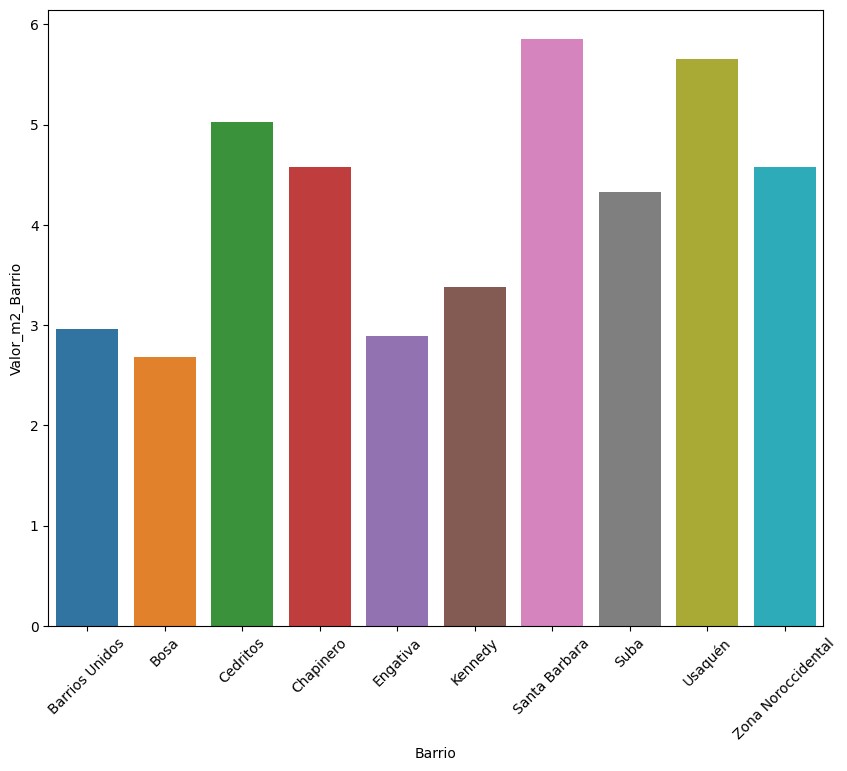

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos un lienzo
plt.figure(figsize=(10,8))

#Realizamos una grafica de barras para observar el top 10 de barrios con mas inmuebles
ax = sns.barplot(x='Barrio',y='Valor_m2_Barrio',data= datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x',rotation=45)

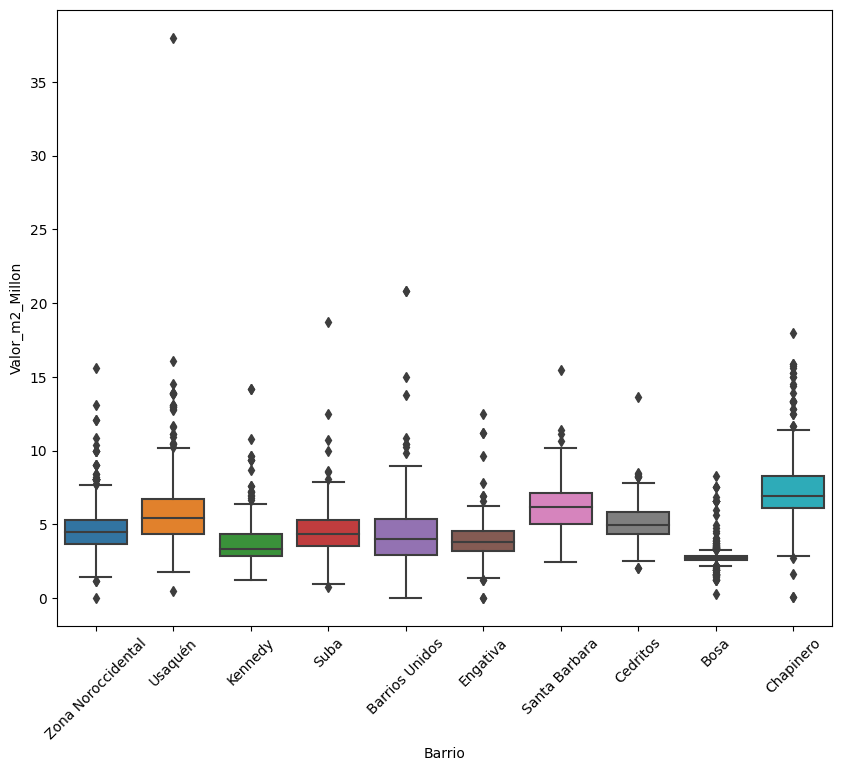

In [ ]:
#Realizamos ahora un boxplot para ver el precio en millones
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio',y='Valor_m2_Millon',data = inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x',rotation=45)
plt.show()

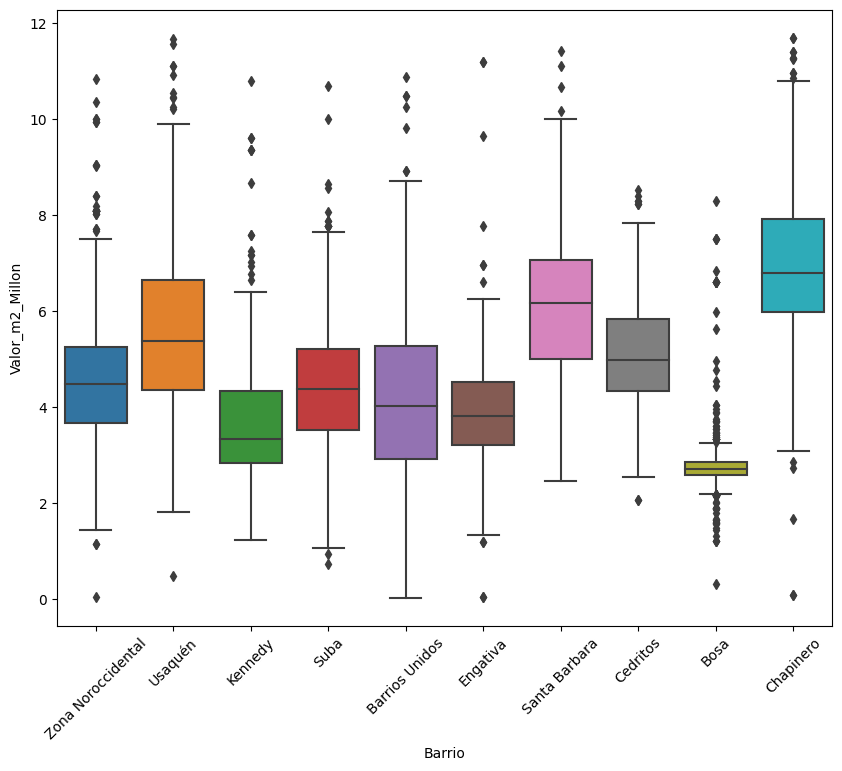

In [ ]:
#Realizamos un zoom del grafico mediante un filtro en query
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio',y='Valor_m2_Millon',data = inmuebles.query('Barrio in @top_barrios & Valor_m2_Millon < 12'))
ax.tick_params(axis='x',rotation=45)
plt.show()

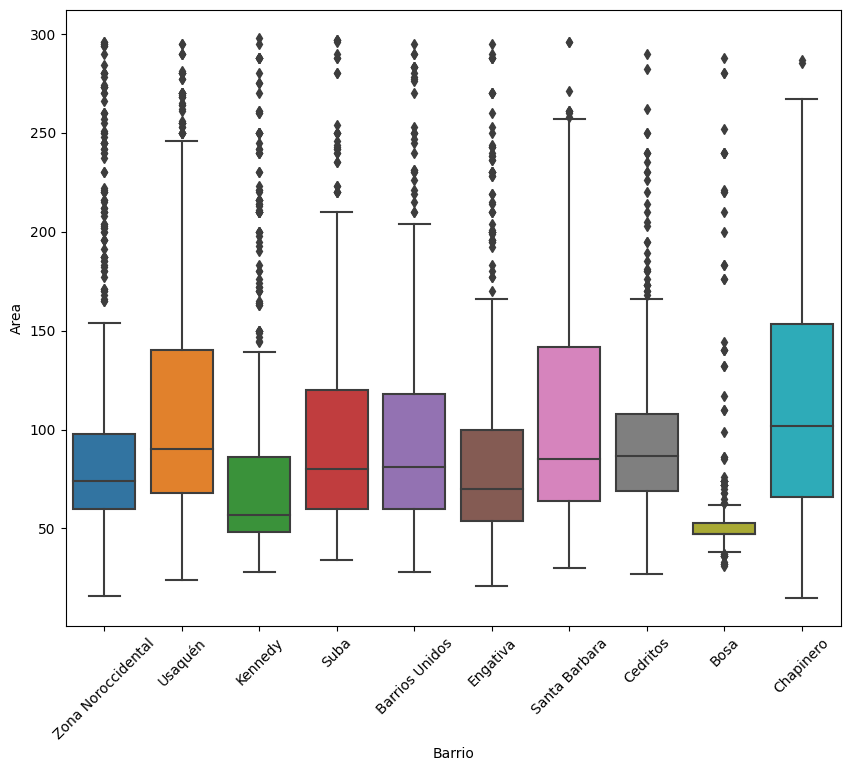

In [ ]:
#Observamos ahora las areas
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio',y='Area',data = inmuebles.query('Barrio in @top_barrios  & Area < 300'))
ax.tick_params(axis='x',rotation=45)
plt.show()

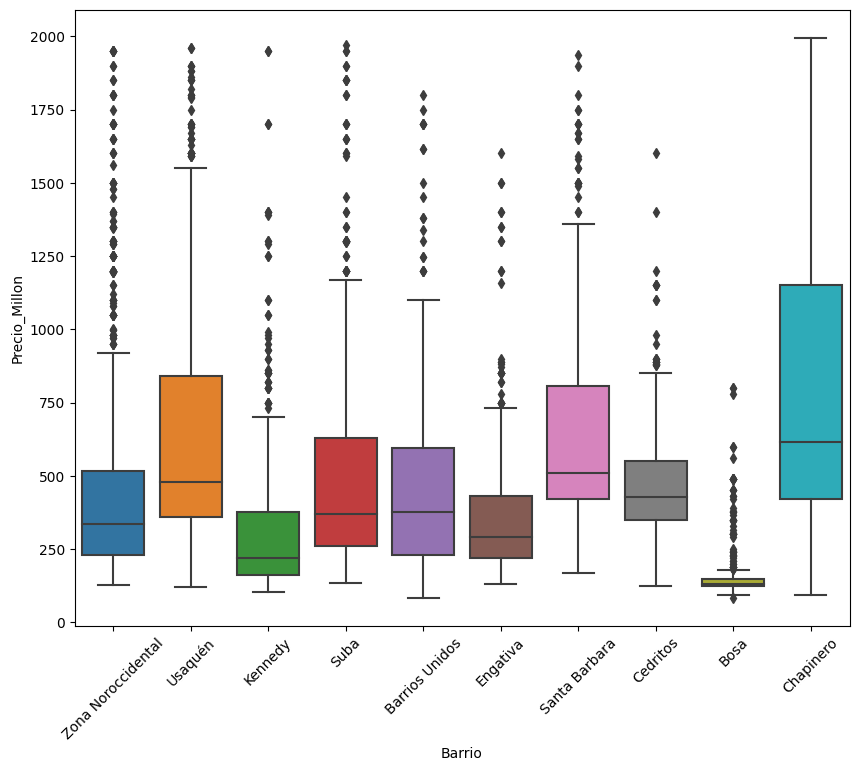

In [ ]:
#Ahora realizaremos un grafico para observar el precio
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio',y='Precio_Millon',data = inmuebles.query('Barrio in @top_barrios  & Precio_Millon < 2000'))
ax.tick_params(axis='x',rotation=45)
plt.show()

Vamos a traer datos estadísticos de la ciudad de Bogotá directamente del DANE y vamos a ver como estos datos nos ayudarían en inclusión de nuevas variables para el calculo del precio de los inmuebles en la ciudad de Bogotá.

Encuesta Multipropósito de Bogotá para obtener informacion socio-ecónomica y de entorno urbano de los habitantes de Bogotá para la formulación, seguimiento y evaluación de las políticas distritales

https://microdatos.dane.gov.co/index.php/catalog/743


In [ ]:
#Cargamos el archivo csv, con las consideraciones de separaciones y decodificación
#sep = refiere al separador con el cual los datos se separan en el archivo
#encoding= refiere a la codificacion necesaria para realizar la lectura de los datos
datos_raw = pd.read_csv('/content/drive/MyDrive/Identificación (Capítulo A).csv', sep = ';', encoding='latin-1')
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [ ]:
#Vemos la forma de la base de datos
datos_raw.shape

(106467, 11)

In [ ]:
#Extraemos solamente los datos referentes al municipio de Bogotá
datos_raw = datos_raw.loc[datos_raw.MPIO==11001]
datos_raw.shape

(86504, 11)

In [ ]:
#Agregamos tablas referentes a nuestro estudio
datos_b = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Datos de la vivenda y su entorno (Capítulo B).csv', sep = ';', encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Condiciones habitacionales del hogar (Capítulo C).csv', sep = ';', encoding='latin-1')
datos_e = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Composición del hogar y demografía (Capítulo E).csv', sep = ';', encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Educación (Capítulo H).csv', sep = ';', encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv', sep = ';', encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Fuerza de trabajo (Capítulo K).csv', sep = ';', encoding='latin-1')


<ipython-input-25-68a0044b6793>:3: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Condiciones habitacionales del hogar (Capítulo C).csv', sep = ';', encoding='latin-1')
<ipython-input-25-68a0044b6793>:4: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Composición del hogar y demografía (Capítulo E).csv', sep = ';', encoding='latin-1')
<ipython-input-25-68a0044b6793>:5: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/ArchivosDANE/Educación (Capítulo H).csv', sep = ';', encoding='latin-1')
<ipython-input-25-68a0044b6793>:6: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  

In [ ]:
#Creamos una variable y le aplicamos merge
#Es decir, adicionaremos columnas a nuestro dataset
datos_dane = pd.merge(datos_raw,datos_b,on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [ ]:
#Realizamos lo mismo con las demas columnas
datos_dane = pd.merge(datos_dane,datos_c,on='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_e,on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-28-a8281422ec17>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_e,on='DIRECTORIO', how='left')


(238559, 281)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_h,on='DIRECTORIO', how='left')
datos_dane.shape

(783952, 416)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_l,on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-113-810c396fd620>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x', 'DIRECTORIO_HOG_x', 'SECUENCIA_P_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_l,on='DIRECTORIO', how='left')


In [ ]:
datos_dane = pd.merge(datos_dane,datos_k,on='DIRECTORIO', how='left')
datos_dane.shape

(210449, 180)

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB
